In [ ]:
import glob
dirs = glob.glob('/home/magdalena/Desktop/magister/SSL_DATASET/ZTF_SSL_Dataset/out_directory/*')

In [ ]:
from tqdm import tqdm
import numpy as np
import pickle
r_band_zero_counter = 0
g_band_zero_counter = 0
ft_nans = []
md_nans = []
len_g = []
len_r = []

for dir in tqdm(dirs, total = len(dirs)):
    with (open(dir, "rb")) as openfile:
        load = pickle.load(openfile)
        if load['flux'].sum(axis =0 )[0] == 0:
            g_band_zero_counter +=1
        else:
            len_g.append((load['flux']!=0).sum(axis =0 )[0])
        if load['flux'].sum(axis =0 )[1] == 0:
            r_band_zero_counter +=1
        else:
            len_r.append((load['flux']!=0).sum(axis =0 )[1])
        ft_nans.append(load['ft_cols'].isna().sum())
        md_nans.append(load['md_cols'].isna().sum())

  0%|          | 0/163430 [00:00<?, ?it/s]

100%|██████████| 163430/163430 [01:52<00:00, 1456.11it/s]


For a total of 163430 object, 18141 have zero observations in the g band, and 17212 have zero observations in the r band
For a total of 163430 object, the mean nan per objects for the features is 12.995703708883664 and the mean nan per object for the metadata is 0.00933383449445372


In [ ]:

print(f'For a total of {len(dirs)} object, {g_band_zero_counter} have zero observations in the g band, and {r_band_zero_counter} have zero observations in the r band')
print(f'For a total of {len(dirs)} object, the mean nan per objects for the features is {np.mean(ft_nans)} and the mean nan per object for the metadata is {np.mean(md_nans)}')

print(f'{np.mean(len_g)} +/- {np.std(len_g)}')
print(f'{np.mean(len_r)}+/- {np.std(len_r)}')

<Axes: ylabel='Count'>

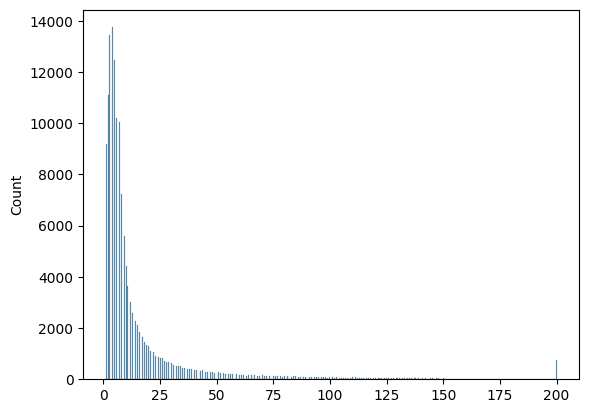

In [ ]:
import seaborn as sns

sns.histplot(len_g)

<Axes: ylabel='Count'>

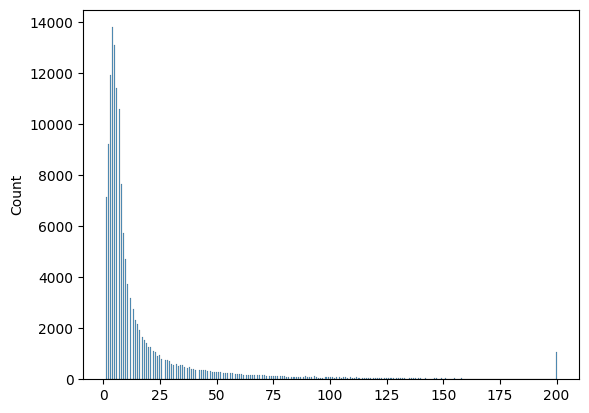

In [ ]:
sns.histplot(len_r)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,3,figsize = (15,5))
sns.heatmap(load['flux'],ax = ax[0], cmap='plasma')
sns.heatmap(load['time'],ax = ax[1], cmap='plasma')
sns.heatmap(load['mask'],ax = ax[2], cmap='plasma')